#Categorical Data

In [ ]:
import os
from google.colab import drive

In [ ]:
gdrive_dir = '/content/drive/'

drive.mount(gdrive_dir, force_remount=True)

Mounted at /content/drive/


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data/TitanicDataset/train.csv
/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data/TitanicDataset/test.csv
/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data/TitanicDataset/gender_submission.csv


In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data/TitanicDataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IntroductionToML/Data/TitanicDataset/test.csv')

In [ ]:
#Peek at the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
train_df.drop(cont_features, axis=1, inplace=True)
train_df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [ ]:
train_df.groupby(train_df['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [ ]:
train_df['Cabin_indicator'] = np.where(train_df['Cabin'].isnull(), 0, 1)
train_df.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 432x288 with 0 Axes>

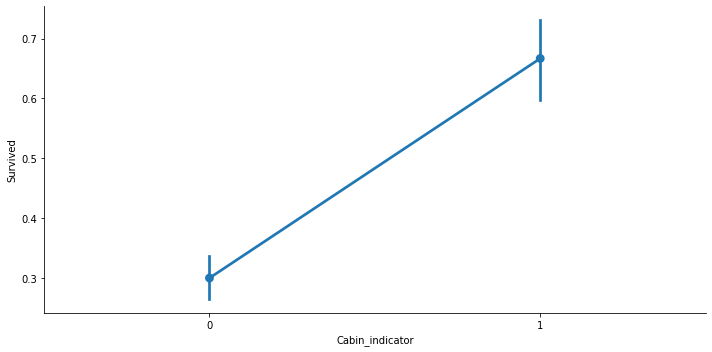

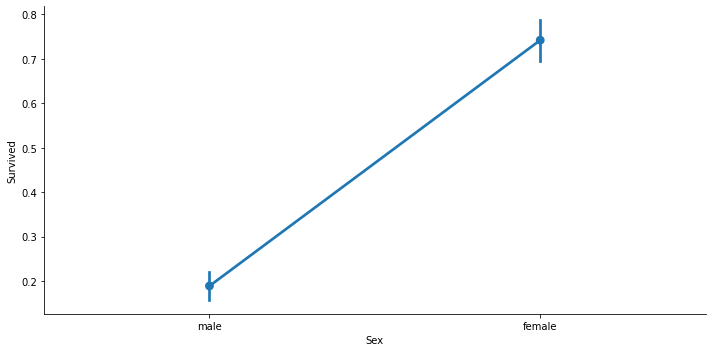

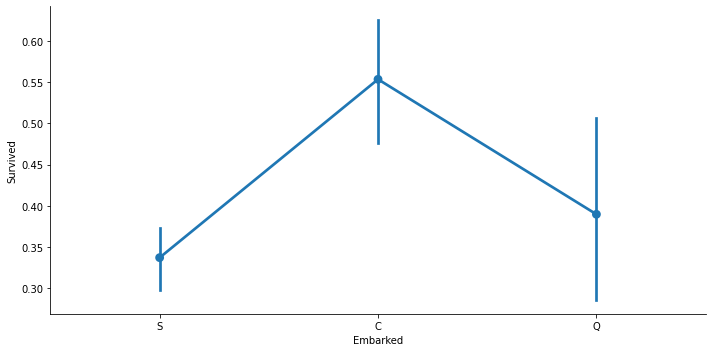

In [ ]:
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2,)

In [ ]:
train_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [ ]:
train_df.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [ ]:
train_df.drop(['Ticket'], axis=1, inplace=True)
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [ ]:
binary_gender = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(binary_gender)

In [ ]:
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [ ]:
train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
train_df.head()

,Survived,Sex,Cabin_indicator
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
